In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
# Load dataset
data = pd.read_csv('/content/drive/MyDrive/Data/mam_saba_naz/sukkur.csv')
data = data.drop(columns=['PEAK DISCHARGE', 'Volume in Cuseecs'])
data = data.rename(columns={"PD in m3/s":"Peak Discharge", "V in m3/s":"Volume"})
data2 = data
data.head()

,YEAR,Duration,Peak Discharge,Volume
0,1977,102,12813.71039,2.849925e+05
1,1978,101,27125.25911,1.014680e+06
2,1979,89,12541.20428,4.299144e+05
3,1980,87,14581.91801,2.773503e+05
4,1981,130,14440.01299,4.328008e+05


# Exploratory Data Analysis

In [ ]:
data_description = data[["Volume","Peak Discharge", "Duration"]].describe()
print(data_description)

             Volume  Peak Discharge    Duration
count  3.600000e+01       36.000000   36.000000
mean   3.470409e+05    12972.927726   97.361111
std    2.850717e+05     8313.143418   18.425375
min    1.515986e+04     1755.413860   55.000000
25%    1.345482e+05     5539.826823   86.250000
50%    2.811714e+05    12274.580400   99.000000
75%    4.525969e+05    18296.956437  106.000000
max    1.016445e+06    29888.720140  142.000000


In [ ]:
print("SKEWNESS")
print(data[["Volume","Peak Discharge"]].skew())
print("******************************************")
print("KURTOSIS")
print(data[["Volume","Peak Discharge"]].kurtosis())
print("*****************************************")

print("MEAN")
print(data[["Volume","Peak Discharge"]].mean())
print("*****************************************")

print("MEDIAN")
print(data[["Volume","Peak Discharge"]].median())

print("*****************************************")

SKEWNESS
Volume            0.934677
Peak Discharge    0.550155
dtype: float64
******************************************
KURTOSIS
Volume            0.034333
Peak Discharge   -0.678294
dtype: float64
*****************************************
MEAN
Volume            347040.887786
Peak Discharge     12972.927726
dtype: float64
*****************************************
MEDIAN
Volume            281171.3849
Peak Discharge     12274.5804
dtype: float64
*****************************************


# Correlation

Pearson Correlation: 0.848810575771854
Kendall Correlation: 0.6793650793650794
Spearman Correlation: 0.8532818532818532


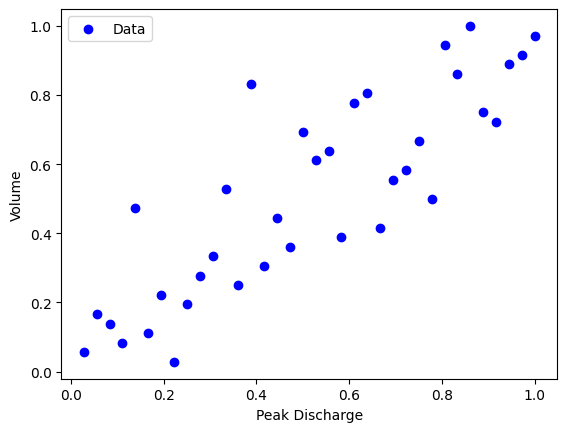

In [ ]:
volume = data['Volume']
duration = data['Peak Discharge']

# Calculate Pearson correlation
pearson_corr = np.corrcoef(volume, duration)[0, 1]

# Calculate Kendall correlation
kendall_corr = volume.corr(duration, method='kendall')

# Calculate Spearman correlation
spearman_corr = volume.corr(duration, method='spearman')

print("Pearson Correlation:", pearson_corr)
print("Kendall Correlation:", kendall_corr)
print("Spearman Correlation:", spearman_corr)

# # Plot the data
# plt.scatter(volume, duration, color='blue', label='Data')
# plt.xlabel('Peak Discharge')
# plt.ylabel('Volume')
# plt.legend()
# plt.show()

# Plot the data after rank transformation (Kendall Plot)
u = volume.rank(pct=True)
v = duration.rank(pct=True)
plt.scatter(u, v, color='blue', label='Data')
plt.xlabel('Peak Discharge')
plt.ylabel('Volume')
plt.legend()
plt.show()

Pearson Correlation: 0.09534496810400707
Kendall Correlation: 0.11369536218425486
Spearman Correlation: 0.18147867345941177


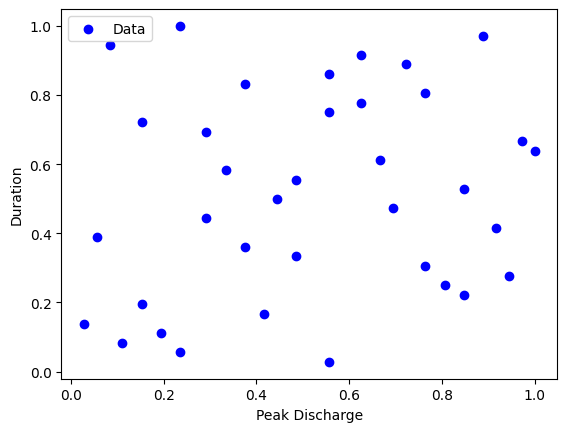

In [ ]:
volume = data['Duration']
duration = data['Peak Discharge']

# Calculate Pearson correlation
pearson_corr = np.corrcoef(volume, duration)[0, 1]

# Calculate Kendall correlation
kendall_corr = volume.corr(duration, method='kendall')

# Calculate Spearman correlation
spearman_corr = volume.corr(duration, method='spearman')

print("Pearson Correlation:", pearson_corr)
print("Kendall Correlation:", kendall_corr)
print("Spearman Correlation:", spearman_corr)

# Plot the data
# plt.scatter(volume, duration, color='blue', label='Data')
# plt.xlabel('Peak Discharge')
# plt.ylabel('Volume')
# plt.legend()
# plt.show()

u = volume.rank(pct=True)
v = duration.rank(pct=True)
plt.scatter(u, v, color='blue', label='Data')
plt.xlabel('Peak Discharge')
plt.ylabel('Duration')
plt.legend()
plt.show()

Pearson Correlation: 0.1080893406176211
Kendall Correlation: 0.11049267592554345
Spearman Correlation: 0.17143230260786166


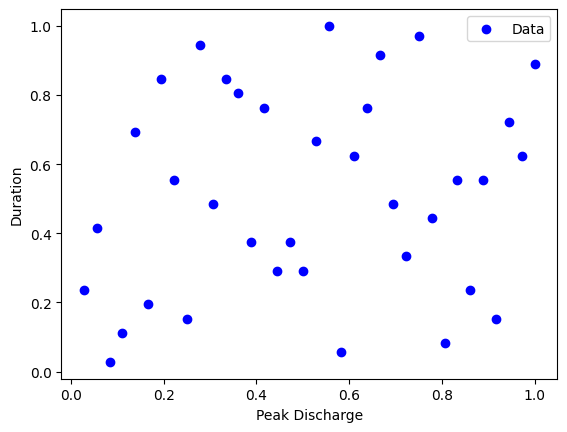

In [ ]:
volume = data['Volume']
duration = data['Duration']

# Calculate Pearson correlation
pearson_corr = np.corrcoef(volume, duration)[0, 1]

# Calculate Kendall correlation
kendall_corr = volume.corr(duration, method='kendall')

# Calculate Spearman correlation
spearman_corr = volume.corr(duration, method='spearman')

print("Pearson Correlation:", pearson_corr)
print("Kendall Correlation:", kendall_corr)
print("Spearman Correlation:", spearman_corr)

# # Plot the data
# plt.scatter(volume, duration, color='blue', label='Data')
# plt.xlabel('Peak Discharge')
# plt.ylabel('Volume')
# plt.legend()
# plt.show()

# Plot the data after rank transformation (Kendall Plot)
u = volume.rank(pct=True) # Percentile Rank = (Total number of values − 1) / (total number of values - number of tied values) × 100
v = duration.rank(pct=True)
plt.scatter(u, v, color='blue', label='Data')
plt.xlabel('Peak Discharge')
plt.ylabel('Duration')
plt.legend()
plt.show()

# Distribution Fitting

In [ ]:
!pip install fitter

In [ ]:
from fitter import Fitter, get_common_distributions, get_distributions
from scipy.stats import *

In [ ]:
dist_list = ['alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 'bradford', 'burr', 'burr12',
             'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma', 'dweibull', 'erlang', 'expon',
             'exponnorm', 'exponpow', 'exponweib', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm',
             'frechet_l', 'frechet_r', 'gamma', 'gausshyper', 'genexpon', 'genextreme', 'gengamma',
             'genhalflogistic', 'geninvgauss', 'genlogistic', 'gennorm', 'genpareto', 'gilbrat', 'gompertz',
             'gumbel_l', 'gumbel_r', 'halfcauchy', 'halfgennorm', 'halflogistic', 'halfnorm', 'hypsecant',
             'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'kappa3', 'kappa4', 'ksone',
             'kstwo', 'kstwobign', 'laplace', 'levy', 'levy_l', 'levy_stable', 'loggamma', 'logistic',
             'loglaplace', 'lognorm', 'loguniform', 'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami',
             'ncf', 'nct', 'ncx2', 'norm', 'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm',
             'powernorm', 'rayleigh', 'rdist', 'recipinvgauss', 'reciprocal', 'rice', 'semicircular',
             'skewnorm', 't', 'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniform', 'vonmises',
             'vonmises_line', 'wald', 'weibull_max', 'weibull_min', 'wrapcauchy']
print(len(dist_list))

100


In [ ]:
data

,YEAR,Duration,Peak Discharge,Volume
0,1977,102,12813.710390,2.849925e+05
1,1978,101,27125.259110,1.014680e+06
2,1979,89,12541.204280,4.299144e+05
3,1980,87,14581.918010,2.773503e+05
4,1981,130,14440.012990,4.328008e+05
5,1982,87,11319.873980,2.492626e+05
6,1983,106,19992.188440,3.177766e+05
7,1984,98,12378.070340,3.945316e+05
8,1985,90,7994.312077,2.729278e+05
9,1986,84,29888.720140,6.933111e+05


In [ ]:
data.head()

,YEAR,Duration,Peak Discharge,Volume
0,1977,102,12813.71039,2.849925e+05
1,1978,101,27125.25911,1.014680e+06
2,1979,89,12541.20428,4.299144e+05
3,1980,87,14581.91801,2.773503e+05
4,1981,130,14440.01299,4.328008e+05


In [ ]:
import scipy.stats as stats
from fitter import Fitter

def plot_and_calculate_stats(data, dist_name, params, param_names):
    x = np.linspace(min(data), max(data), 100)
    dist_obj = getattr(stats, dist_name)
    pdf_values = dist_obj.pdf(x, *params)

    # Plotting
    plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Data Histogram')
    plt.plot(x, pdf_values, 'r-', lw=2, label=f'Fitted {dist_name}')
    plt.title(f'Fitted {dist_name} Distribution')
    plt.xlabel('Data Values')
    plt.ylabel('Density')
    plt.legend()
    plt.show()
    # Calculating statistics
    mean, var = dist_obj.stats(*params, moments='mv')
    print(f"{dist_name} distribution mean: {mean}, variance: {var}")
    # Printing parameters in a dictionary format
    param_dict = dict(zip(param_names, params))
    print(f"Fitted parameters for {dist_name}: {param_dict}")
    # Generate random values from the fitted distribution (example: 1000 values)
    simulated_values = dist_obj.rvs(*params, size=1000)
    print(f"First 5 simulated values from {dist_name}: {simulated_values[:5]}")

col = 'Peak Discharge'
data = data[col].dropna().values

task = input("Type 'common' to fit common distributions, or 'selected' for specific distributions: ").lower()

if task == 'common':
    f = Fitter(data, timeout=100)
    f.fit()
    best_dist_name = list(f.get_best(method='aic').keys())[0] # sumaquare_error, aic, bic
    best_dist_params = f.fitted_param[best_dist_name]
    plot_and_calculate_stats(data, best_dist_name, best_dist_params, ['loc', 'scale'])

elif task == 'selected':
    dist_parm_dict = {
    "alpha":            ["a", "loc", "scale"],
    "anglit":           ["loc", "scale"],
    "arcsine":          ["loc", "scale"],
    "argus":            ["chi", "loc", "scale"],
    "beta":             ["a", "b", "loc", "scale"],
    "betaprime":        ["a", "b", "loc", "scale"],
    "bradford":         ["c", "loc", "scale"],
    "burr":             ["c", "d", "loc", "scale"],
    "burr12":           ["c", "d", "loc", "scale"],
    "cauchy":           ["loc", "scale"],
    "chi":              ["df", "loc", "scale"],
    "chi2":             ["df", "loc", "scale"],
    "cosine":           ["loc", "scale"],
    "crystalball":      ["beta", "m", "loc", "scale"],
    "dgamma":           ["a", "loc", "scale"],
    "dweibull":         ["c", "loc", "scale"],
    "erlang":           ["a", "loc", "scale"],
    "expon":            ["loc", "scale"],
    "exponnorm":        ["K", "loc", "scale"],
    "exponpow":         ["b", "loc", "scale"],
    "exponweib":        ["a", "c", "loc", "scale"],
    "f":                ["dfn", "dfd", "loc", "scale"],
    "fatiguelife":      ["c", "loc", "scale"],
    "fisk":             ["c", "loc", "scale"],
    "foldcauchy":       ["c", "loc", "scale"],
    "foldnorm":         ["c", "loc", "scale"],
    "frechet_l":        ["c", "loc", "scale"],
    "frechet_r":        ["c", "loc", "scale"],
    "gamma":            ["a", "loc", "scale"],
    "gausshyper":       ["a", "b", "c", "z", "loc", "scale"],
    "genexpon":         ["a", "b", "c", "loc", "scale"],
    "genextreme":       ["c", "loc", "scale"],
    "gengamma":         ["a", "c", "loc", "scale"],
    "genhalflogistic":  ["c", "loc", "scale"],
    "geninvgauss":      ["p", "b", "loc", "scale"],
    "genlogistic":      ["c", "loc", "scale"],
    "gennorm":          ["beta", "loc", "scale"],
    "genpareto":        ["c", "loc", "scale"],
    "gilbrat":          ["loc", "scale"],
    "gompertz":         ["c", "loc", "scale"],
    "gumbel_l":         ["loc", "scale"],
    "gumbel_r":         ["loc", "scale"],
    "halfcauchy":       ["loc", "scale"],
    "halfgennorm":      ["beta", "loc", "scale"],
    "halflogistic":     ["loc", "scale"],
    "halfnorm":         ["loc", "scale"],
    "hypsecant":        ["loc", "scale"],
    "invgamma":         ["a", "loc", "scale"],
    "invgauss":         ["mu", "loc", "scale"],
    "invweibull":       ["c", "loc", "scale"],
    "johnsonsb":        ["a", "b", "loc", "scale"],
    "johnsonsu":        ["a", "b", "loc", "scale"],
    "kappa3":           ["a", "loc", "scale"],
    "kappa4":           ["h", "k", "loc", "scale"],
    "ksone":            ["n", "loc", "scale"],
    "kstwo":            ["n", "loc", "scale"],
    "kstwobign":        ["loc", "scale"],
    "laplace":          ["loc", "scale"],
    "levy":             ["loc", "scale"],
    "levy_l":           ["loc", "scale"],
    "levy_stable":      ["alpha", "beta", "loc", "scale"],
    "loggamma":         ["c", "loc", "scale"],
    "logistic":         ["loc", "scale"],
    "loglaplace":       ["c", "loc", "scale"],
    "lognorm":          ["s", "loc", "scale"],
    "loguniform":       ["a", "b", "loc", "scale"],
    "lomax":            ["c", "loc", "scale"],
    "maxwell":          ["loc", "scale"],
    "mielke":           ["k", "s", "loc", "scale"],
    "moyal":            ["loc", "scale"],
    "nakagami":         ["nu", "loc", "scale"],
    "ncf":              ["dfn", "dfd", "nc", "loc", "scale"],
    "nct":              ["df", "nc", "loc", "scale"],
    "ncx2":             ["df", "nc", "loc", "scale"],
    "norm":             ["loc", "scale"],
    "norminvgauss":     ["a", "b", "loc", "scale"],
    "pareto":           ["b", "loc", "scale"],
    "pearson3":         ["skew", "loc", "scale"],
    "powerlaw":         ["a", "loc", "scale"],
    "powerlognorm":     ["c", "s", "loc", "scale"],
    "powernorm":        ["c", "loc", "scale"],
    "rayleigh":         ["loc", "scale"],
    "rdist":            ["c", "loc", "scale"],
    "recipinvgauss":    ["mu", "loc", "scale"],
    "reciprocal":       ["a", "b", "loc", "scale"],
    "rice":             ["b", "loc", "scale"],
    "semicircular":     ["loc", "scale"],
    "skewnorm":         ["a", "loc", "scale"],
    "t":                ["df", "loc", "scale"],
    "triang":           ["c", "loc", "scale"],
    "truncexpon":       ["b", "loc", "scale"],
    "truncnorm":        ["a", "b", "loc", "scale"],
    "tukeylambda":      ["lam", "loc", "scale"],
    "uniform":          ["loc", "scale"],
    "vonmises":         ["kappa", "loc", "scale"],
    "vonmises_line":    ["kappa", "loc", "scale"],
    "wald":             ["loc", "scale"],
    "weibull_max":      ["c", "loc", "scale"],
    "weibull_min":      ["c", "loc", "scale"],
    "wrapcauchy":       ["c", "loc", "scale"]
}
    print("Available distributions include:", ', '.join(dist_list))
    selected_dists = input("Enter the distributions to fit, separated by commas (e.g., norm,expon): ").split(',')

    for dist_name in selected_dists:
        dist_name = dist_name.strip()
        if dist_name in dist_parm_dict:
            try:
                params = getattr(stats, dist_name).fit(data)
                plot_and_calculate_stats(data, dist_name, params, dist_parm_dict[dist_name])
            except Exception as e:
                print(f"Could not fit {dist_name} due to: {e}")
        else:
            print(f"{dist_name} is not listed or does not have predefined parameter names.")


# Capola Fitting

In [ ]:
!pip install copulas

In [ ]:
!pip install scipy

In [ ]:
!git clone https://github.com/sdv-dev/Copulas.git

In [ ]:
!cd /content/Copulas

In [ ]:
data2.head()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from copulas.bivariate.frank import Frank

from scipy.stats import rankdata

def transform_to_uniform(column):
    ranks = rankdata(column, method='average')
    uniform = (ranks - 1) / (len(column) - 1)
    uniform = np.clip(uniform, 0.0001, 0.9999)
    return uniform

def fit_frank_copula(df, col1, col2):
    u = transform_to_uniform(df[col1])
    v = transform_to_uniform(df[col2])
    data = np.vstack([u, v]).T
    copula = Frank()
    copula.fit(data)
    copula.theta = copula.compute_theta()
    model_details = {
        'theta': copula.theta,
        'tau': copula.tau,
    }
    return copula, model_details

def plot_copula_results(copula, df, col1, col2):
    samples = copula.sample(len(df))
    plt.scatter(df[col1], df[col2], label='Original Data', alpha=0.5)
    plt.scatter(samples[:, 0], samples[:, 1], label='Copula Samples', alpha=0.5)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.legend()
    plt.title('Copula Fitting Results')
    plt.show()

if __name__ == "__main__":
    filename = data2
    print("Available columns:", list(data2.columns))
    col1 = 'Peak Discharge'
    col2 = 'Volume'
    copula, model_details = fit_frank_copula(data2, col1, col2)

    print("Model Details:")
    print(model_details)
    plot_copula_results(copula, data2, col1, col2)

In [ ]:
frank, model_details = fit_frank_copula(data2, "Volume", "Peak Discharge")
print(frank)

In [ ]:
from scipy.stats import kstest
import numpy as np

# Assuming `empirical_uniform` is your original data transformed to uniform
# and `copula_samples` are samples generated from your fitted copula model
ks_statistic, p_value = kstest(empirical_uniform, copula_samples)

# Calculate RMSE
rmse = np.sqrt(np.mean((empirical_uniform - copula_samples)**2))

print(f"KS Statistic: {ks_statistic}, P-Value: {p_value}")
print(f"RMSE: {rmse}")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from copulas.bivariate.clayton import Clayton
from scipy.stats import rankdata

def preprocess_data(df, col1, col2):
    df[col1] = (df[col1] - df[col1].min()) / (df[col1].max() - df[col1].min())
    df[col2] = (df[col2] - df[col2].min()) / (df[col2].max() - df[col2].min())
    return df[[col1, col2]]

def fit_clayton_copula(df, col1, col2):
    copula = Clayton()
    data = df[[col1, col2]].values
    copula.fit(data)
    theta = copula.compute_theta()
    model_details = {
        'theta': theta,
    }
    return copula, model_details

def plot_copula_results(copula, df, col1, col2, n_samples=1000):
    samples = copula.sample(n_samples)
    plt.scatter(df[col1], df[col2], label='Original Data', alpha=0.5)
    plt.scatter(samples[:, 0], samples[:, 1], label='Copula Samples', alpha=0.5)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.legend()
    plt.title('Clayton Copula Fitting Results')
    plt.show()

# Main execution
if __name__ == "__main__":
    filename = data2

    col1 = 'Peak Discharge'
    col2 = 'Volume'
    df_preprocessed = preprocess_data(data2, col1, col2)
    copula, model_details = fit_clayton_copula(df_preprocessed, col1, col2)

    print("Model Details:")
    print(model_details)
    plot_copula_results(copula, df_preprocessed, col1, col2)

In [ ]:
from copulas.bivariate.gumbel import Gumbel
from scipy.stats import kendalltau

def normalize_data(df, col1, col2):
    df[col1] = (df[col1] - df[col1].min()) / (df[col1].max() - df[col1].min())
    df[col2] = (df[col2] - df[col2].min()) / (df[col2].max() - df[col2].min())
    return df[[col1, col2]]

def fit_gumbel_copula(df, col1, col2):
    data = normalize_data(df, col1, col2)
    tau, _ = kendalltau(data[col1], data[col2])
    copula = Gumbel()
    copula.tau = tau
    copula.theta = copula.compute_theta()

    return copula.theta, tau

def plot_data_and_copula(df, col1, col2, theta):
    plt.scatter(df[col1], df[col2], alpha=0.5, label='Original Data')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.legend()
    plt.title(f'Gumbel Copula with θ={theta:.2f}')
    plt.show()

if __name__ == "__main__":
    filename = data2
    col1 = 'Volume'
    col2 = 'Peak Discharge'
    theta, tau = fit_gumbel_copula(data2, col1, col2)
    print(f"Theta: {theta}, Tau: {tau}")
    plot_data_and_copula(data2, col1, col2, theta)

In [ ]:
from copulas.bivariate.independence import Independence

def normalize_data(df, col1, col2):
    df[col1] = (df[col1] - df[col1].min()) / (df[col1].max() - df[col1].min())
    df[col2] = (df[col2] - df[col2].min()) / (df[col2].max() - df[col2].min())
    return df[[col1, col2]]

data = normalize_data(data2, 'Volume', 'Peak Discharge')
independence_copula = Independence()
plt.scatter(data2['Volume'], data2['Peak Discharge'], alpha=0.5, label='Original Data')
u = np.linspace(0, 1, len(data))
v = np.linspace(0, 1, len(data))
plt.scatter(u, v, alpha=0.5, label='Independence Assumption', color='r')
plt.xlabel('Volume')
plt.ylabel('Peak Discharge')
plt.legend()
plt.title('Comparison of Original Data with Independence Assumption')
plt.show()

# Goodness of Fit Test
- RMSE
- AIC
- Cramér-von Mises

In [ ]:
from scipy.stats import kstest, cramervonmises_2samp

def empirical_copula_samples(df, u, v):
    return np.vstack([u, v]).T

def goodness_of_fit_test(empirical_samples, model_samples):
    empirical_samples_flat = empirical_samples.flatten()
    model_samples_flat = model_samples.flatten()
    result = cramervonmises_2samp(empirical_samples_flat, model_samples_flat)
    return result

empirical_samples = empirical_copula_samples(data2, col1, col2)
model_samples = copula.sample(len(data2))
print("Empirical Samples:", empirical_samples)

result = goodness_of_fit_test(empirical_samples, model_samples)
print("Goodness of Fit Test Result:")
print("Cramér-von Mises statistic")
print(f"Statistic: {result.statistic}, p-value: {result.pvalue}")

In [ ]:
from scipy.stats import kstest, cramer_vonmises

def calculate_rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

def evaluate_goodness_of_fit(copula, data, col1, col2):
    # Generate samples from copula
    samples = copula.sample(len(data))

    # For KS and Cramér-von Mises, we consider the empirical distribution of the original data
    # and compare it against the distribution of the samples generated from the copula

    # Convert data columns to uniform
    u_empirical = transform_to_uniform(data[col1])
    v_empirical = transform_to_uniform(data[col2])

    # Calculate the KS test statistic and p-value for each dimension
    ks_statistic_u, ks_p_value_u = kstest(samples[:, 0], lambda x: u_empirical)
    ks_statistic_v, ks_p_value_v = kstest(samples[:, 1], lambda x: v_empirical)

    # For RMSE, we calculate the differences between empirical data and copula samples
    rmse_u = calculate_rmse(samples[:, 0], u_empirical)
    rmse_v = calculate_rmse(samples[:, 1], v_empirical)

    # Cramér-von Mises test (you need to implement or adapt the comparison for copula distributions)
    # Note: Implementing Cramér-von Mises for copula might require custom code or finding a suitable approximation
    # cvm_statistic, cvm_p_value = cramer_vonmises(...)  # This is just a placeholder

    return {
        'KS Statistic U': ks_statistic_u,
        'KS P-value U': ks_p_value_u,
        'KS Statistic V': ks_statistic_v,
        'KS P-value V': ks_p_value_v,
        'RMSE U': rmse_u,
        'RMSE V': rmse_v,
        # 'Cramer-von Mises Statistic': cvm_statistic,  # This would require actual implementation
        # 'Cramer-von Mises P-value': cvm_p_value,
    }


In [ ]:
from scipy.stats import cramervonmises_2samp, anderson_ksamp
from sklearn.metrics import mean_squared_error
from math import sqrt, log

# Define tests as functions
def cramervonmises_test(empirical_samples, model_samples):
    empirical_samples_flat = empirical_samples.flatten()
    model_samples_flat = model_samples.flatten()
    result = cramervonmises_2samp(empirical_samples_flat, model_samples_flat)
    return f"Cramér-von Mises: Statistic={result.statistic}, p-value={result.pvalue}"

def andersondarling_test(empirical_samples, model_samples):
    empirical_samples_flat = empirical_samples.flatten()
    model_samples_flat = model_samples.flatten()
    result = anderson_ksamp([empirical_samples_flat, model_samples_flat])
    return f"Anderson-Darling: Statistic={result.statistic}, Significance Levels={result.significance_level}"

def calculate_rmse(empirical_samples, model_samples):
    rmse = sqrt(mean_squared_error(empirical_samples, model_samples))
    return f"RMSE: {rmse}"

def calculate_aic(log_likelihood, num_params):
    return 2 * num_params - 2 * log_likelihood

def calculate_bic(log_likelihood, num_params, num_samples):
    return num_params * log(num_samples) - 2 * log_likelihood

test_functions = [cramervonmises_test, andersondarling_test, calculate_rmse]
test_results = []
empirical_samples = np.array(empirical_copula_samples(data2, col1, col2))
model_samples = np.array(copula.sample(len(data2)))
print("Emperical Sample:", empirical_samples)
print("Model Sample:", model_samples)
for test_function in test_functions:
    result = test_function(empirical_samples, model_samples)
    test_results.append(result)

for result in test_results:
    print(result)

In [ ]:
def calculate_rmse(empirical_samples, model_samples):
    # Ensure both inputs are numpy arrays for element-wise operations
    empirical_samples = np.array(empirical_samples)
    model_samples = np.array(model_samples)

    # Verify the shapes match
    if empirical_samples.shape != model_samples.shape:
        raise ValueError("Empirical and model samples must have the same shape.")

    rmse = sqrt(mean_squared_error(empirical_samples, model_samples))
    return rmse

# This requires actual empirical data, corrected as explained above
rmse = calculate_rmse(empirical_samples, model_samples)
print(f"RMSE: {rmse}")


In [ ]:
from scipy.stats import anderson_ksamp

def anderson_darling_test(empirical_samples, model_samples):
    """
    Perform an adapted Anderson-Darling test for goodness of fit between
    empirical copula samples and model samples. This function flattens the 2-D samples
    into 1-D arrays to perform the test, which is a heuristic approach.
    """
    # Flatten the samples
    empirical_samples_flat = empirical_samples.flatten()
    model_samples_flat = model_samples.flatten()

    # Perform the Anderson-Darling test
    # Note: anderson_ksamp might show a warning for samples with less than 20 observations.
    result = anderson_ksamp([empirical_samples_flat, model_samples_flat])

    return result

# Assuming 'empirical_samples' and 'model_samples' are already defined from your copula
# Perform the Anderson-Darling test
result = anderson_darling_test(empirical_samples, model_samples)

print("Anderson-Darling Test Result:")
print(f"Statistic: {result.statistic}, Significance Levels: {result.significance_level}, Critical Values: {result.critical_values}")
